In [54]:
import os
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import cv2

In [55]:
datalist_raw = os.listdir('./Data')

In [77]:
blob = np.zeros((300,64*64))

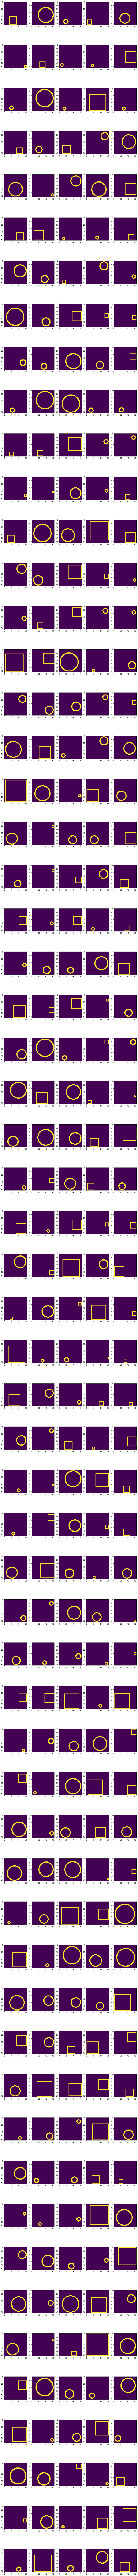

In [82]:
i = 0
for f in datalist_raw:
    img = cv2.imread("./Data/%s"%(f,))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blob[i,:] = img.flatten()
    i += 1

rows = int(blob.shape[0]/5) + 1
cols = 5
plt.figure(figsize=(15, 5*rows))
for j in range(300):
    plt.subplot(rows, cols, j+1)
#     plt.figure(figsize=(2,2))
    img = blob[j]
    img = img.reshape((64,64))
    plt.imshow(img)

In [58]:
blob /= 255
blob = blob.reshape((-1,64,64,1)).astype(np.float16)
blob.shape

(300, 64, 64, 1)

In [59]:
y = np.loadtxt('./data.csv',delimiter=',',dtype=np.int8)
y = np.array([[0] if yy[0]==1 else [1] for yy in y])
y = y.reshape((y.shape[0], y.shape[1]))
y = tf.keras.utils.to_categorical(y)
y.shape

(300, 2)

In [71]:
with tf.device('GPU:0'):
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Conv2D(16, (3, 3), strides=(2,2), input_shape=(64,64,1), data_format='channels_last', name='Conv1'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2), name='Pool1'))
    
    model.add(tf.keras.layers.Conv2D(8, (3, 3), strides=(2,2), data_format='channels_last', name='Conv2'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2), name='Pool2'))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(4, activation='relu'))
    model.add(tf.keras.layers.Dense(4, activation='relu'))
    model.add(tf.keras.layers.Dense(2, activation='softmax'))

In [72]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 31, 31, 16)        160       
_________________________________________________________________
Pool1 (MaxPooling2D)         (None, 15, 15, 16)        0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 7, 7, 8)           1160      
_________________________________________________________________
Pool2 (MaxPooling2D)         (None, 3, 3, 8)           0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 72)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 4)                 292       
_________________________________________________________________
dense_26 (Dense)             (None, 4)                 20        
__________

In [73]:
with tf.device('GPU:0'):
    optimizer = tf.keras.optimizers.Adam(lr=0.001)
    model.compile(optimizer, loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [74]:
with tf.device('GPU:0'):
    history1 = model.fit(x=blob, y=y, batch_size=4, epochs=30)
    history2 = model.fit(x=blob, y=y, batch_size=2, epochs=20)

Epoch 1/30
300/300 [==============================] - 2s 6ms/step - loss: 0.6924 - acc: 0.5233
Epoch 2/30
300/300 [==============================] - 1s 2ms/step - loss: 0.6839 - acc: 0.6000
Epoch 3/30
300/300 [==============================] - 0s 1ms/step - loss: 0.6275 - acc: 0.7467
Epoch 4/30
300/300 [==============================] - 1s 2ms/step - loss: 0.4365 - acc: 0.8600
Epoch 5/30
300/300 [==============================] - 1s 2ms/step - loss: 0.2820 - acc: 0.9267
Epoch 6/30
300/300 [==============================] - 0s 1ms/step - loss: 0.1874 - acc: 0.9400
Epoch 7/30
300/300 [==============================] - 1s 3ms/step - loss: 0.1277 - acc: 0.9633
Epoch 8/30
300/300 [==============================] - 0s 2ms/step - loss: 0.0860 - acc: 0.9700
Epoch 9/30
300/300 [==============================] - 1s 2ms/step - loss: 0.0623 - acc: 0.9867
Epoch 10/30
300/300 [==============================] - 0s 2ms/step - loss: 0.0482 - acc: 0.9933
Epoch 11/30
300/300 [============================

In [75]:
history = model.evaluate(x=blob,y=y, batch_size=1, )

print("Loss: %f | Accuracy:%f"%(history[0], history[1]))

300/300 [==============================] - 1s 3ms/step
Loss: 0.000086 | Accuracy:1.000000
